# Librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils.plot_grid import PlotGrid
import random
import copy

# Inicializando variables

Matriz de recompensa

In [2]:
reward =  [-10,-1,-1,-1]  + \
        [-1,-1,-1,-1] + \
        [-5,-1,-1,-1] + \
        [-1,-1,-1,1]
        
reward
dimension_x = 4
dimension_y = 4

In [3]:
ploter = PlotGrid(dimension_x,dimension_y)

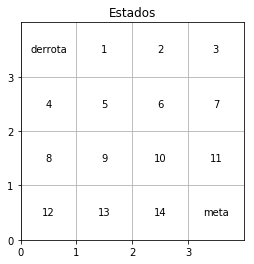

In [4]:
num_states = 16
states = list(range(16))
states[0]="derrota"
states[15]="meta"
ploter.drawGrid(states,"Estados")

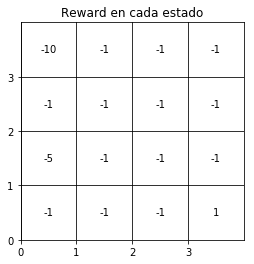

In [5]:
ploter.drawGrid(reward,"Reward en cada estado")

# Inicializando la función accion valor

Las posibles acciones son:

- Arriba
- Abajo
- Derecha
- Izquierda

In [6]:
#Acciones disponibles
actions = ["arriba","abajo","derecha","izquierda"]
#Tamano de los estados
states = range(len(reward))
#Por cada estado inicializando su valor en 0
action_value = {state:{action:0 for action in actions} for state in states}

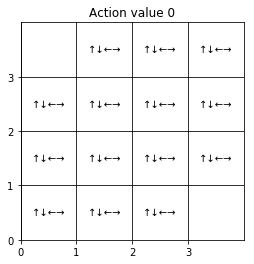

In [7]:
ploter.printActionValue(action_value=action_value)

# Definiendo la función E-Greedy

In [8]:
#Probabilidad de elegir una acción no greedy
epsilon = 0.1 
#Definiendo la funcion Greedy
def get_action_e_greedy(state,dimension_x,dimension_y):
    
    x = state%4
    y = int(np.floor(state/4))
    actions_ava = action_value[state].keys()
    
    if(x == 0):
        actions_ava = actions_ava - set(["izquierda"])
        action_value[state]["izquierda"] = action_value[state]["izquierda"] -1
    if(x == dimension_x -1 ):
        actions_ava = actions_ava - set(["derecha"])
        action_value[state]["derecha"] = action_value[state]["derecha"] -1
    if(y == 0):
        actions_ava = actions_ava - set(["arriba"])
        action_value[state]["arriba"] = action_value[state]["arriba"] -1
    if(y == dimension_y - 1):
        actions_ava = actions_ava - set(["abajo"])
        action_value[state]["abajo"] = action_value[state]["abajo"] -1
        
    action_greedy = max(actions_ava ,key = lambda valor: action_value[state][valor])
    
    if random.random() <= epsilon:
        action_greedy = list(actions_ava - set(action_greedy))[random.randint(0,len(actions_ava) - 2 )]
    return action_greedy,action_value[state][action_greedy]

# Obtener el estado resultante de una acción

In [9]:
import operator
def getState(state,action,dimension_x,dimension_y):
    
    if(action == "arriba"):
        state = state - dimension_x
    if(action == "abajo"):
        state = state + dimension_x
    
    if(action == "izquierda"):
        state = state - 1
    if(action == "derecha"):
        state = state + 1
    return state  

In [10]:
gamma = 0.99
alpha=0.1
          
def maxQas(state_apostrofe):
    return max(action_value[state_apostrofe].values())

In [11]:
counter = 0
array_grids = []

In [12]:
state = random.randint(a=0,b=len(reward) - 2)
for i in range(2400):
    state = random.randint(a=0,b=len(reward) - 2)
    if(counter%400 == 0):
        array_grids.append({"action_value":copy.deepcopy(action_value),"counter":counter})
        
    action,value = get_action_e_greedy(state,dimension_x,dimension_y)
    new_state = getState(state,action,dimension_x,dimension_y)
    maxq = maxQas(new_state)
    reward_v = reward[new_state]
    new_q = action_value[state][action] + alpha*(reward_v+(gamma*maxq) - action_value[state][action])
    action_value[state][action] = new_q
    state = new_state
    counter+=1

array_grids.append({"action_value":copy.deepcopy(action_value),"counter":counter})

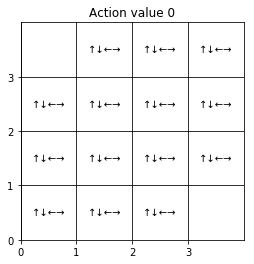

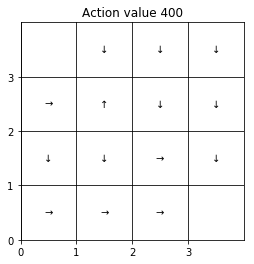

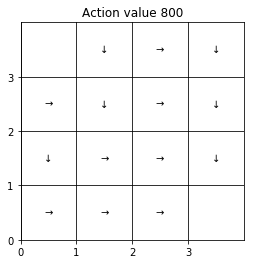

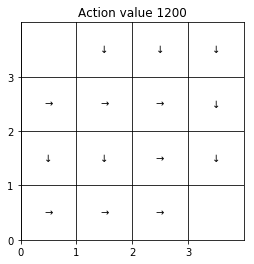

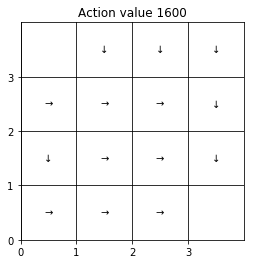

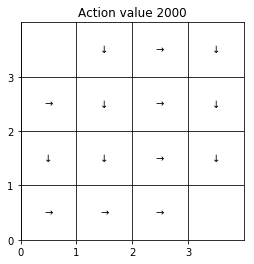

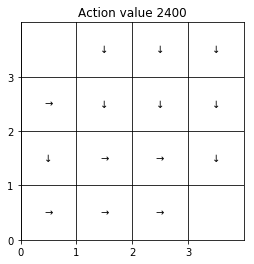

In [13]:
for grid_s in array_grids:
    ploter.printActionValue(grid_s["action_value"],grid_s["counter"])

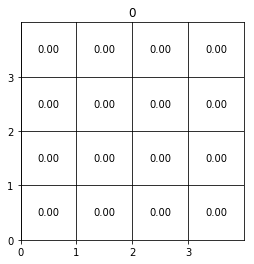

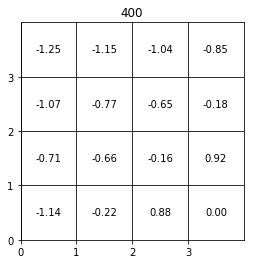

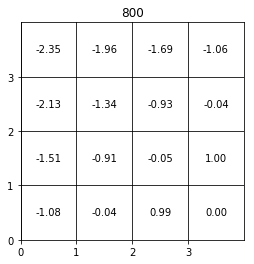

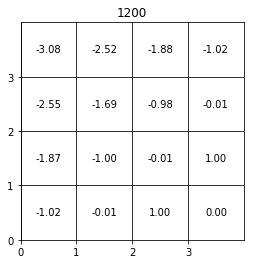

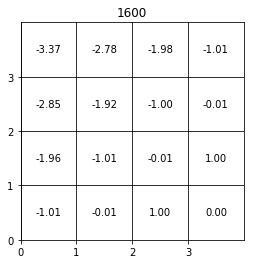

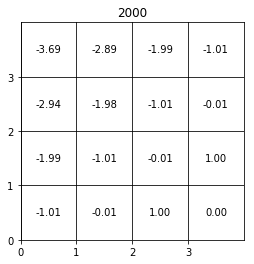

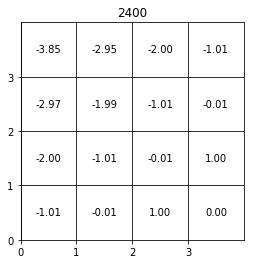

In [14]:
for grid_s in array_grids:
    ploter.drawGrid(
                    list(map(lambda el:"%.2f" % max(el[1].values()), grid_s["action_value"].items())),
                    grid_s["counter"]
            )